In [31]:
%matplotlib notebook
import signac
import flow
import numpy as np
from matplotlib import pyplot as plt
import copy

from project import Project
print(signac.__version__)
print(flow.__version__)

mplColors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
             'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

0.9.3
0.6.2


In [4]:
project = Project()
print(project)

HelloWorldGA


502


<IPython.core.display.Javascript object>


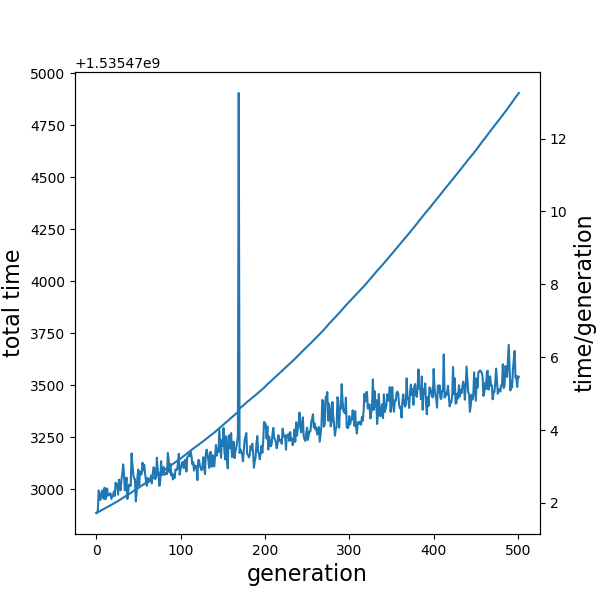

In [42]:
d = copy.copy(project.doc)
print(len(d.time))
n = len(d)
g = np.array([int(key) for key in d.time])
t = np.array([d.time[key] for key in d.time])
dt = t[1:] - t[:-1]
dg = g[1:]
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.plot(g, t)
ax2 = ax1.twinx()
ax2.plot(dg, dt)

ax1.set(xlabel="generation", ylabel="total time")
ax1.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.set(ylabel="time/generation")
ax2.yaxis.label.set_size(16)
plt.show()

save data for later plotting

<IPython.core.display.Javascript object>


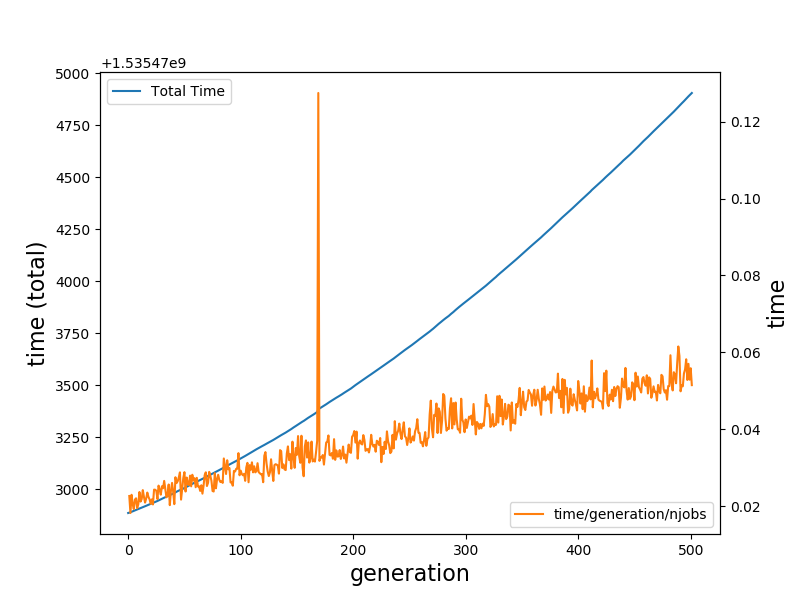

In [43]:
d = copy.copy(project.doc)
g = np.array([int(key) for key in d.time])
t = np.array([d.time[key] for key in d.time])
nj = np.array([d.njobs[key] for key in d.njobs])
# print("mean: {}; std: {}".format(np.mean(nj), np.std(nj)))
dt = t[1:] - t[:-1]
dg = g[1:]
dn = nj[1:]
# save data
np.save("Bash.Serial.time.npy", t)
np.save("Bash.Serial.generation.npy", g)
np.save("Bash.Serial.njobs.npy", nj)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(g, t, color='tab:blue', label='Total Time')
ax2 = ax1.twinx()
# ax2.plot(dg, dt)
# ax2.plot(dg, dn)
ax2.plot(dg, np.divide(dt, dn), color='tab:orange', label='time/generation/njobs')

ax1.set(xlabel="generation", ylabel="time (total)")
ax1.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)
ax2.set(ylabel="time")
ax2.yaxis.label.set_size(16)
ax1.legend(loc=2)
ax2.legend(loc=4)
plt.show()

<IPython.core.display.Javascript object>


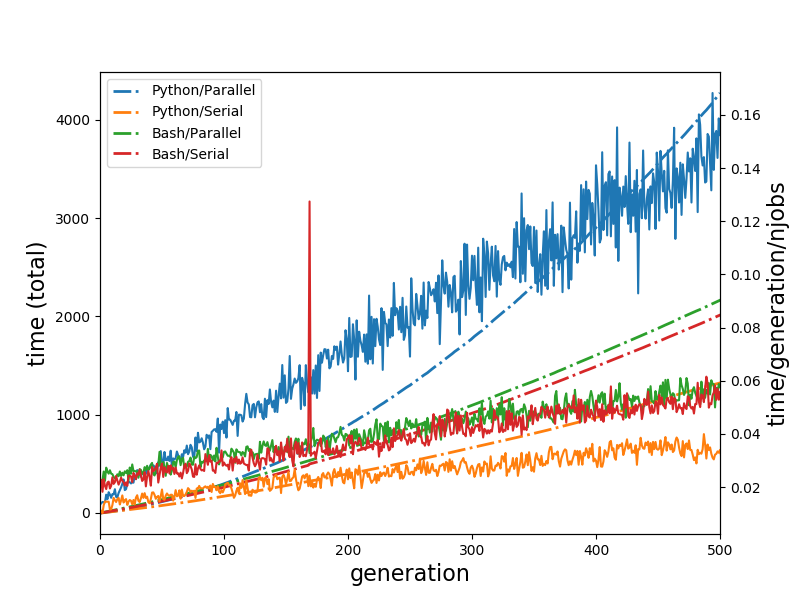

In [49]:
# load and compare

## Python

### parallel
ppt = np.load("Python.Parallel.time.npy")
ppg = np.load("Python.Parallel.generation.npy")
ppn = np.load("Python.Parallel.njobs.npy")

ppt[:] = ppt[:] - ppt[0]
ppdt = ppt[1:] - ppt[:-1]
ppdg = ppg[1:]
ppdn = ppn[1:]
ppdt = np.divide(ppdt, ppdn)

### serial
pst = np.load("Python.Serial.time.npy")
psg = np.load("Python.Serial.generation.npy")
psn = np.load("Python.Serial.njobs.npy")

pst[:] = pst[:] - pst[0]
psdt = pst[1:] - pst[:-1]
psdg = psg[1:]
psdn = psn[1:]
psdt = np.divide(psdt, psdn)

## Bash

### parallel
bpt = np.load("Bash.Parallel.time.npy")
bpg = np.load("Bash.Parallel.generation.npy")
bpn = np.load("Bash.Parallel.njobs.npy")

bpt[:] = bpt[:] - bpt[0]
bpdt = bpt[1:] - bpt[:-1]
bpdg = bpg[1:]
bpdn = bpn[1:]
bpdt = np.divide(bpdt, bpdn)

### serial
bst = np.load("Bash.Serial.time.npy")
bsg = np.load("Bash.Serial.generation.npy")
bsn = np.load("Bash.Serial.njobs.npy")

bst[:] = bst[:] - bst[0]
bsdt = bst[1:] - bst[:-1]
bsdg = bsg[1:]
bsdn = bsn[1:]
bsdt = np.divide(bsdt, bsdn)

# plot

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(ppg, ppt, color=mplColors[0], label='Python/Parallel', ls="-.", linewidth=2)
ax1.plot(psg, pst, color=mplColors[1], label='Python/Serial' ,ls="-.", linewidth=2)
ax1.plot(bpg, bpt, color=mplColors[2], label='Bash/Parallel', ls="-.", linewidth=2)
ax1.plot(bsg, bst, color=mplColors[3], label='Bash/Serial', ls="-.", linewidth=2)

ax2 = ax1.twinx()
ax2.plot(ppdg, ppdt, color=mplColors[0])
ax2.plot(psdg, psdt, color=mplColors[1])
ax2.plot(bpdg, bpdt, color=mplColors[2])
ax2.plot(bsdg, bsdt, color=mplColors[3])

# ax2.plot(dg, dt)
# ax2.plot(dg, dn)
# ax2.plot(dg, np.divide(dt, dn), color='tab:orange', label='time/generation/njobs')

ax1.set(xlabel="generation", ylabel="time (total)")
ax1.set_xlim((0,500))
ax1.xaxis.label.set_size(16)
ax1.yaxis.label.set_size(16)

ax2.set(ylabel="time/generation/njobs")
ax2.yaxis.label.set_size(16)

ax1.legend(loc=2)
# ax2.legend(loc=4)
plt.show()

In [8]:
print(project.doc)
# project.print_status(detailed=True)

{'generation': {'n': 501, 'members': None}, 'time': {'0': 1535462040.7416935, '1': 1535462041.853551, '2': 1535462043.2825065, '3': 1535462044.7019992, '4': 1535462046.1548123, '5': 1535462047.8711965, '6': 1535462049.513647, '7': 1535462051.30545, '8': 1535462053.0762022, '9': 1535462054.8355858, '10': 1535462056.7811244, '11': 1535462058.6967702, '12': 1535462060.677337, '13': 1535462062.360527, '14': 1535462064.0254822, '15': 1535462065.8405657, '16': 1535462067.6652617, '17': 1535462069.5538442, '18': 1535462071.6517591, '19': 1535462073.9869726, '20': 1535462075.9330277, '21': 1535462077.8944588, '22': 1535462080.2328937, '23': 1535462082.5471084, '24': 1535462084.822078, '25': 1535462086.9812825, '26': 1535462089.3167262, '27': 1535462091.700056, '28': 1535462094.333202, '29': 1535462096.7470112, '30': 1535462099.4414184, '31': 1535462102.013627, '32': 1535462104.6573527, '33': 1535462107.1415908, '34': 1535462109.8132877, '35': 1535462112.497323, '36': 1535462115.1668122, '37': 

In [ ]:

def isEligible(job):
    if 'eligible' in job.document:
        if job.document.eligible == True:
            return True
        else:
            return False
    else:
        return False


def isNotEligible(job):
    if 'eligible' in job.document:
        if job.document.eligible == True:
            return False
        else:
            return True
    else:
        return False

In [ ]:
with project.open_job(id="a53fd35b5d71b10dd3e27c7c35e426c3") as job:
    print(job.document)